# Tutorial Geospatial Data


## Part #1: Understanding, Reading and Exploring Geospatial Data

In this chapter, you will be introduced to the concept and idea of geospatial data and how to represent such data in Python using the GeoPandas library. You will then learn about common geospatial file formats and the basics to read, explore and visualize such data.

### What is Geospatial Data?

Geospatial data is information that has a geographic aspect to it. Two very different but common data formats used to store geospatial data are vector and raster representations:

- **Vector Representation**

    Vector data use X and Y coordinates - or longitude and latitude information - to define the locations of points, lines, and areas (polygons) that correspond to map features. As such, vector data tend to define centers and edges of features. <br><br>
    
    ![](Pics/Vector.png)

- **Raster Representation**
    
    Raster data, on the other hand, use a matrix of square areas to define where features are located. These squares, also called pixels, cells, and grids, typically are of uniform size, and their size determines the detail that can be maintained in the dataset. Because raster data represent square areas, they describe interiors rather than boundaries as is the case with vector data.
    
     ![](Pics/raster.png)
    
**Vector data** are excellent for capturing and storing spatial details, while **raster data** are well suited for capturing, storing, and analyzing data such as elevation, temperature, soil pH, etc. that vary continuously from location to location. Raster data formats also are used to store aerial and satellite imagery.

### Creating a Virtual Environment for Geospatial Analysis

Python offers many **packages** to work with geospatial data and it’s relevant file types. Specifically, we'll make use of **GeoPandas, Shapely, and Contextily**. Installing these packages is not always straightforward due to the many libraries that need to be installed as dependencies (e.g. FIONA or GDAL).

I learned that setting up a virtual environment was the simplest and cleanest way to successfully install all relevant packages. If this topic is new to you, please check this [primer](https://realpython.com/python-virtual-environments-a-primer/) first. The setup of a particular geospatial environment is described [here](https://medium.com/@Arbolmarket/working-with-geospatial-data-in-python-a5ad984c1161).

In [4]:
# import pandas and matplotlib
import pandas as pd
import matplotlib.pyplot as plt

# import geospatial packages
import geopandas as gpd
from shapely.geometry import Point
import contextily

### Plotting Latitude and Longitude

Before we dive into specific geospatial file formats, let's get a taste of traditional location plotting using simply longitude (always on x-axis!) and latitude (always on y-axis!). Latitudes are the lines that run north to south, and longitudes are the lines that run east to west.

Style elements like color, marker type, and marker size help make your plot visually appealling, x- and y-labels add information, and grid lines give a more precise idea of where things are:

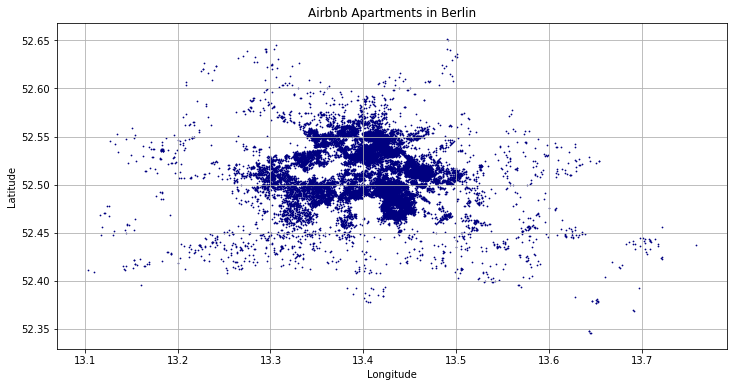

In [3]:
# read the airbnb csv file
airbnb = pd.read_csv('Data/airbnb_listings_berlin.csv')
airbnb.head(2)

# all airbnb apartments in Berlin
plt.figure(figsize=(12,6))
plt.scatter(airbnb.longitude, airbnb.latitude, marker='p', s=0.8, color='navy')

plt.title('Airbnb Apartments in Berlin')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid();

### Geospatial File Formats

We just learned that in addition to point data, such as latitude and longitude, spatial data can be also made up of lines and polygons. Each object then consists of multiple points which cannot easily be represented in a csv file or a Pandas DataFrame. Therefore it's much more convenient to use specific spatial file formats.

To read such files and work with them in Python, we are going to use the **GeoPandas** library designed to work with vector data.

The **ESRI shapefile `(.shp)`** is currently the most used vector format. However, despite its popularity, it comes with a drawback: It is a multi-file format, meaning one "file" consists of multiple files. If you receive a shapefile, you actually get a set of files `(.shp, .dbf, .shx, .prj, ...)`. So when copying a shape file, make sure to copy all the files.

The **GeoJSON `(.geojson)`** is the light weight format of JSON, often used in web applications. Unlike shapefiles, `(.geojson)` is a single file and thus easier to work with.

**GeoPackage `(.gpkg)`** is a relatively new open standad format with more advanced capabilities. In many cases, it's a modern and better working alternative for shapefiles.

Apart from these three, there are many other vector formats out in the wild.

### Reading Geospatial Files

GeoPandas can read many geospatial file formats with the `read_file()` method to which we pass the path to the file. 
In my example here, we use shape files that are stored in one directory together with all other files:

In [5]:
germany = gpd.read_file('Data/Cleansed_Data/Germany.shp')
germany.head()

,ID_1,NAME,TYPE,geometry
0,1,Baden-Württemberg,State,"(POLYGON ((8.70837306976324 47.71555709838862,..."
1,2,Bayern,State,"POLYGON ((10.13385963439953 50.5499992370606, ..."
2,3,Berlin,State,"POLYGON ((13.17788982391357 52.39031982421886,..."
3,4,Brandenburg,State,"POLYGON ((13.87950801849365 53.50106811523438,..."
4,5,Bremen,State,(POLYGON ((8.505060195922852 53.23289108276379...


In [6]:
type(germany)

geopandas.geodataframe.GeoDataFrame

*(This dataset is originally sourced from https://www.diva-gis.org/datadown and cleansed a bit.)*

You see that we now have a **GeoPandas GeoDataFrame**. You can think of it as a normal Pandas DataFrame supercharged with geospatial capabilities. 

A GeoPandas GeoDataFrame has always a `geometry` column that holds the geometry information, while the other columns are attributes that describe each of the geometries. 

Our dataset contains Germany's federal states with the `geometry` made up of polygons representing them. Plotting a GeoDataFrame is as easy as calling `GeoDataFrame.plot()`:

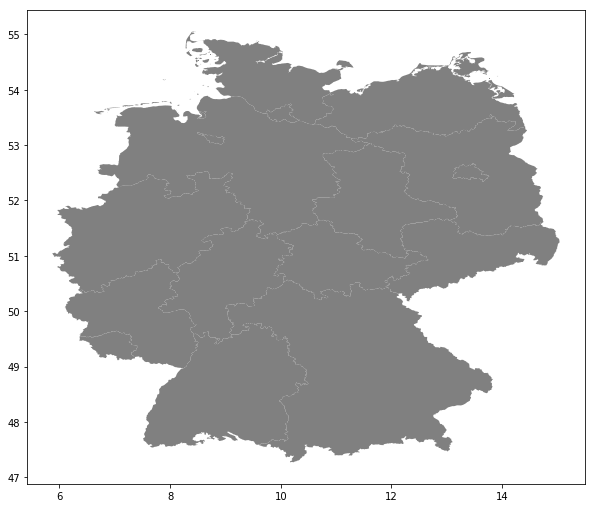

In [7]:
germany.plot(color='grey', figsize=(10,10));

### Spatial Data and its Attributes

One of the specific aspects of a GeoDataFrame is that is has a `.geometry` attribute, which always gives back the `geometry` column:

In [8]:
germany.geometry

0     (POLYGON ((8.70837306976324 47.71555709838862,...
1     POLYGON ((10.13385963439953 50.5499992370606, ...
2     POLYGON ((13.17788982391357 52.39031982421886,...
3     POLYGON ((13.87950801849365 53.50106811523438,...
4     (POLYGON ((8.505060195922852 53.23289108276379...
5     POLYGON ((10.07161712646496 53.71823120117199,...
6     POLYGON ((9.49876976013195 51.63151931762707, ...
7     (POLYGON ((14.26472282409662 53.710693359375, ...
8     (POLYGON ((6.86527681350708 53.59597396850586,...
9     POLYGON ((8.666278839111328 52.52527999877941,...
10    POLYGON ((7.799629211425781 50.94301986694336,...
11    POLYGON ((7.037960052490234 49.64337921142589,...
12    POLYGON ((11.63250827789307 53.01641082763672,...
13    POLYGON ((12.8779993057251 51.67269897460938, ...
14    (POLYGON ((8.689722061157283 54.066806793213, ...
15    POLYGON ((10.77189064025873 51.6449089050293, ...
Name: geometry, dtype: object

In [9]:
type(germany.geometry)

geopandas.geoseries.GeoSeries

What is returned here is a **GeoSeries** object - the equivalent to a Pandas Series but with additional spatial-specific attributes and methods. One example of such method is the `.area` attribute of the GeoSeries which returns the area of each geometry.

In [10]:
germany.geometry.area

0     4.351014
1     8.651863
2     0.117153
3     3.896075
4     0.052821
5     0.104142
6     2.664529
7     3.159141
8     6.350174
9     4.434194
10    2.487793
11    0.324915
12    2.696926
13    2.361059
14    2.154141
15    2.077353
dtype: float64

You might wonder what units these measurements are made in as it looks a bit strange.

To understand this, we need to make ourselves familiar with another important concepts: the **Coordinate Reference System (or CRS)** and **map projections**. 

A map projection is a method for taking the curved surface of the earth and displaying it on something flat, like a computer screen or a piece of paper. Map projections are necessary to represent the earth in 2-dimensional space. There are several map projections which preserve some of the properties of the sphere at the expense of others.

![](Pics/Gedymin-faces-Map-Projections.png)

Setting the CRS for a GeoDataFrame tells GeoPandas how to interpet the longitude and latitude coordinates. Distance units are also dependent on the CRS being used. **The most common CRS systems are EPSG:4326 and EPSG:3857**. (EPSG stands for European Petroleum Survey Group, the entity that developed these systems.)

*EPSG:4326* is used with applications like Google Earth and units here are decimal degrees - where *EPSG:3857* is used in most map applications such as Google Map, Bing Maps, or Open Street Maps. Units here are meters.

Using the `.crs` attribute returns the CRS used in our GeoDataFrame's geometry attribute:

In [11]:
germany.geometry.crs

{'init': 'epsg:4326'}

Now we've learned that our GeoDataFrame's geometry uses decimal degrees to measure the distances from the reference points. We can convert the geometry to measure distance in meters using the `.to_crs()` method. 

Let's convert the CRS to EPSG:3857 so that the resulting measurements are in meters. Note that the original latitude and longitude columns remain in decimal degree units. `.to_crs()` only changes the geometry column!

In [12]:
# convert geometry from decimal degrees to meters
germany.geometry = germany.geometry.to_crs(epsg=3857)
germany.head(2)

,ID_1,NAME,TYPE,geometry
0,1,Baden-Württemberg,State,(POLYGON ((969411.6557639017 6059663.455499538...
1,2,Bayern,State,"POLYGON ((1128096.094271866 6542076.526387665,..."


And now the returned value of the `.area` attribute is different from that before:

In [13]:
germany.geometry.area

0     8.146227e+10
1     1.633086e+11
2     2.384753e+09
3     7.927602e+10
4     1.092559e+09
5     2.172412e+09
6     5.203054e+10
7     6.621568e+10
8     1.300898e+11
9     8.823689e+10
10    4.788178e+10
11    6.185397e+09
12    5.430654e+10
13    4.654634e+10
14    4.562633e+10
15    4.082255e+10
dtype: float64

Also pay attention to the change the plot of Germany now made after we changed the CRS:

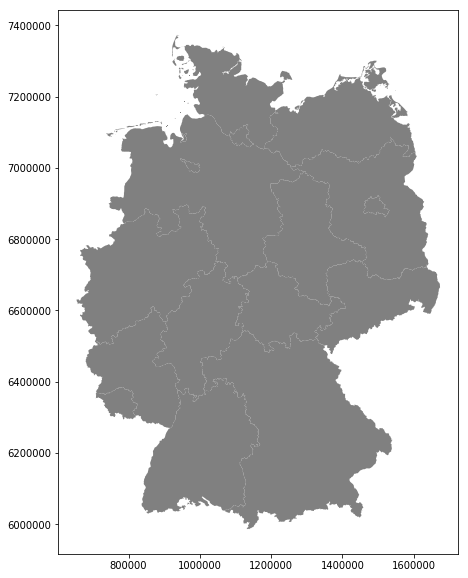

In [14]:
germany.plot(color='grey', figsize=(10,10));

You can look at a specific geometry object by calling it with `.loc[]` or `.iloc[]`

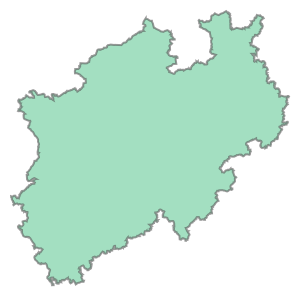

In [15]:
# iloc locates datapoint - here "North Rhine-Westphalia" - with given row and column index
germany.iloc[9, 3]

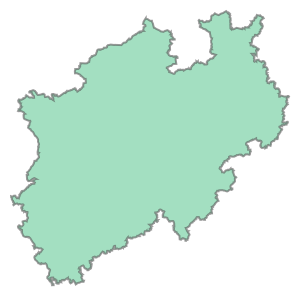

In [16]:
# loc locates datapoint - again "North Rhine-Westphalia" - with given row name and column name
germany.loc[9, 'geometry']

You can also print a geometry by wrapping the call of loc or iloc with the `print()` function. In our case it gives you all the latitude longitudes pairs that define the polygon with each pair seperated by a comma:

In [17]:
#print(germany.loc[9, 'geometry'])

The GeoPandas package provides many of the methods for a GeoDataFrame that the Pandas package provides for a DataFrame, e.g. the `.head()` method we used earlier. 

Another example is filtering, where we can use a Boolean mask to filter the GeoDataFrame for let's say the state of *Bavaria*:

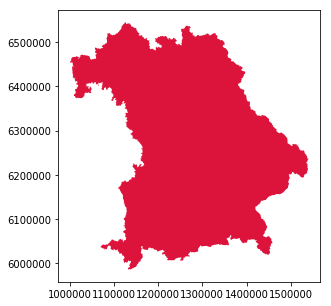

In [18]:
bavaria = germany[(germany['NAME']=='Bayern')]
bavaria.plot(color='crimson', figsize=(5,5));

... or all states from row 10 upwards:

In [25]:
germany[germany['ID_1'] > 10]

,ID_1,NAME,TYPE,geometry
10,11,Rheinland-Pfalz,State,"POLYGON ((868250.7521922593 6611220.779264295,..."
11,12,Saarland,State,"POLYGON ((783462.1292666144 6384742.941853001,..."
12,13,Sachsen-Anhalt,State,"POLYGON ((1294924.898143595 6986034.056423392,..."
13,14,Sachsen,State,"POLYGON ((1433572.32514945 6741160.215764701, ..."
14,15,Schleswig-Holstein,State,(POLYGON ((967335.4349831031 7182818.867348688...
15,16,Thüringen,State,"POLYGON ((1199121.38095443 6736173.336138491, ..."


### Visualizing and Exploring Geospatial Data

To inspect some of the basic methods to visualize geospatial data, let's load a new shape file of Berlin and its 12 districts:

In [26]:
berlin_districs = gpd.read_file('Data/Cleansed_Data/Berlin_Districts.shp')
berlin_districs

,OBJECTID,DISTRICT,Shape__Are,Shape__Len,POPULATION,geometry
0,1,Reinickendorf,2.416586e+08,85589.289316,263920,"POLYGON ((13.3207443281765 52.6265990635925, 1..."
1,2,Charlottenburg-Wilmersdorf,1.742738e+08,71785.131858,338923,"POLYGON ((13.3211096415616 52.5244629906886, 1..."
2,3,Treptow-Köpenick,4.503972e+08,149810.619914,267167,"POLYGON ((13.5792539458089 52.3908302513483, 1..."
3,4,Pankow,2.792661e+08,109210.896203,404534,"(POLYGON ((13.5048079665743 52.6195982101068, ..."
4,5,Neukölln,1.207122e+08,66590.293473,329767,"POLYGON ((13.4583203518438 52.4856882506131, 1..."
5,6,Lichtenberg,1.406199e+08,75961.265817,288320,"POLYGON ((13.5231622474414 52.4742418993467, 1..."
6,7,Marzahn-Hellersdorf,1.666802e+08,67457.607608,267452,"POLYGON ((13.6131722225913 52.4721329895958, 1..."
7,8,Spandau,2.477770e+08,100052.537728,241905,"POLYGON ((13.231191375419 52.5612351042813, 13..."
8,9,Steglitz-Zehlendorf,2.754574e+08,103050.006867,307088,"POLYGON ((13.3195245310051 52.4669887925436, 1..."
9,10,Mitte,1.062882e+08,58707.772351,379610,"POLYGON ((13.3772116516902 52.5609060360395, 1..."


*(This dataset is originally sourced from [opendate-esri-de](https://opendata-esri-de.opendata.arcgis.com/datasets/9f5d82911d4545c4be1da8cab89f21ae_0?selectedAttribute=Gemeinde_n), cleansed, and enriched with [Wikipedia](https://de.wikipedia.org/wiki/Liste_der_Bezirke_und_Ortsteile_Berlins).)*

In [27]:
berlin_districs.geometry.crs

{'init': 'epsg:4326'}

In [28]:
berlin_districs.to_crs(epsg=3857)
berlin_districs.head(2)

,OBJECTID,DISTRICT,Shape__Are,Shape__Len,POPULATION,geometry
0,1,Reinickendorf,2.416586e+08,85589.289316,263920,"POLYGON ((13.3207443281765 52.6265990635925, 1..."
1,2,Charlottenburg-Wilmersdorf,1.742738e+08,71785.131858,338923,"POLYGON ((13.3211096415616 52.5244629906886, 1..."


Let's explore different methods of plotting this GeoDataFrame:

***Plot with Uniform Color***

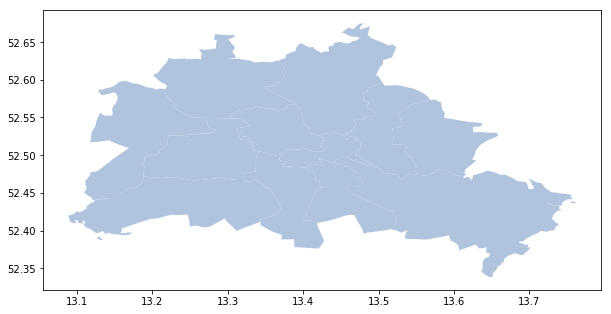

In [29]:
berlin_districs.plot(color='lightsteelblue', figsize=(10,10));

***Plot with Adjusted Colormap***

We can also adjust the color based on specific attributes' values by using the `column` keyword:

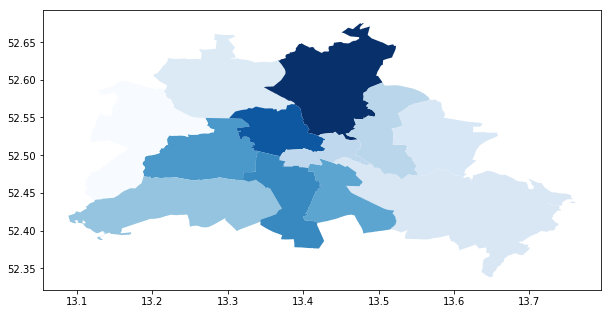

In [30]:
berlin_districs.plot(column='POPULATION', cmap='Blues', figsize=(10,10));

You can also style plot legends by passing a dictionary with keywards to `GeoPandas.plot()`. Here you see the an example:

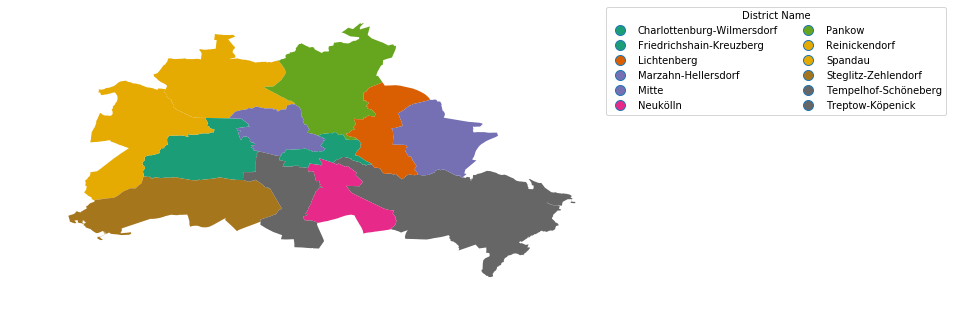

In [31]:
leg_kwds={'title':'District Name', 
          'loc': 'upper left', 
          'bbox_to_anchor':(1, 1.03), 
          'ncol':2}

berlin_districs.plot(column='DISTRICT', cmap='Dark2', figsize=(10,10),
               legend=True, legend_kwds=leg_kwds)

# remove the axis
plt.axis('off');

***Multi-Layer Plot***

Often we also would want to combine multiple layers of geometries in a single plot. For example, we could combine 
- a scatterplot of the **airbnb data** containing latitude and longitude of each airbnb apartment
- with the polygon geometries of **berlin_districts data** 

to see where in Berlin the apartments are located. 

To add an additional layer to an existing plot, we can use the ax keyword of the `.plot()` method:

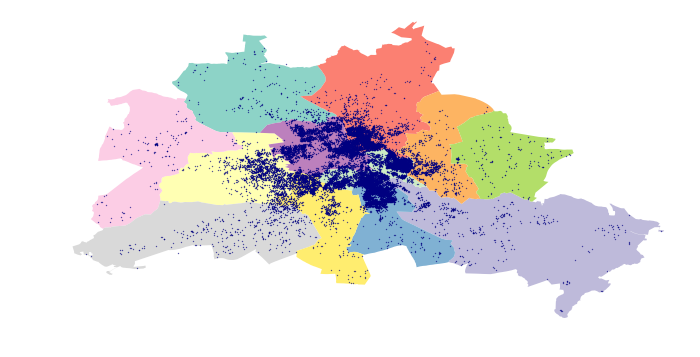

In [32]:
fig, ax = plt.subplots(figsize=(12, 6))

# plot the map of Berlin
berlin_districs.plot(ax=ax, cmap='Set3')

# plot the airbnb data
ax.plot(airbnb.longitude, airbnb.latitude, 'o', markersize=0.3, color='navy')

# remove the axis
ax.set_axis_off();

***Colormaps***

Choosing the right colormap requires a bit of thought. Here are some ideas:









- When you map regions without a quantitative relationship, a ***qualitative colormap*** is the correct choice:

<img src="Pics/Qualitative_Colormap.png" align="left" height="300" width="300"/>

- ***Divergent colormaps*** are best at highlighting a particular middle range of quantitatively related maps:

<img src="Pics/Diverging_Colormap.png" align="center" height="300" width="300"/>

- If you map regions with a quantitative relationship and do not want to focus on one particular range within your data, a ***sequential colormap*** is best:

<img src="Pics/Sequential_Colormap.png" align="right" height="300" width="300"/>

***Calculating a Spatial Variation***

In the previous exercise we visualized the districts with a uniform column: `POPULATION`. But often we want to show the *spatial variation* of a variable and color the polygons accordingly. Now we will visualize the spatial variation of the *population density* in Berlin. For this purpose, we will first calculate the population density by dividing the population by the area, and add the result as a new column to the dataframe.

*(Note: The area is given in squared meter, so you will need to multiply the result with 10 ** 6)*

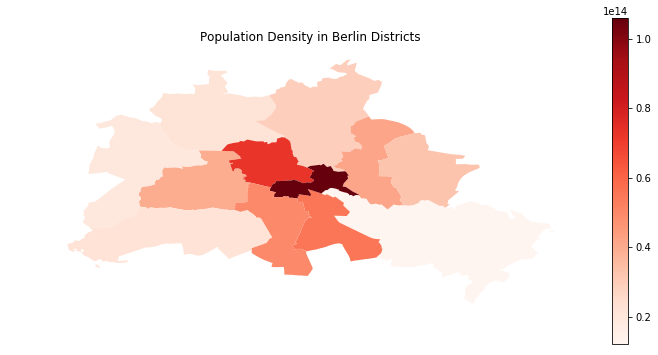

In [33]:
# add a population density column
berlin_districs['POPULATION_DENSITY'] = berlin_districs['POPULATION'] / berlin_districs.geometry.area * 10**6

# make a plot of the districts colored by the population density
fig, ax = plt.subplots(figsize=(12, 6))
berlin_districs.plot(ax=ax, column='POPULATION_DENSITY', legend=True, cmap='Reds')
ax.set_title('Population Density in Berlin Districts')
ax.set_axis_off();

***Using Pandas Functionality***

Now let's use a common functionality of Pandas: the `.groupby()` method to manipulate data. (...)

In [38]:
# calculate the number of room types of each type
room_types = airbnb.groupby('room_type').size()
room_types

room_type
Entire home/apt    10722
Private room       11534
Shared room          296
dtype: int64

In [39]:
# take a subset of the shared rooms
shared_rooms = airbnb[airbnb['room_type']=='Shared room']

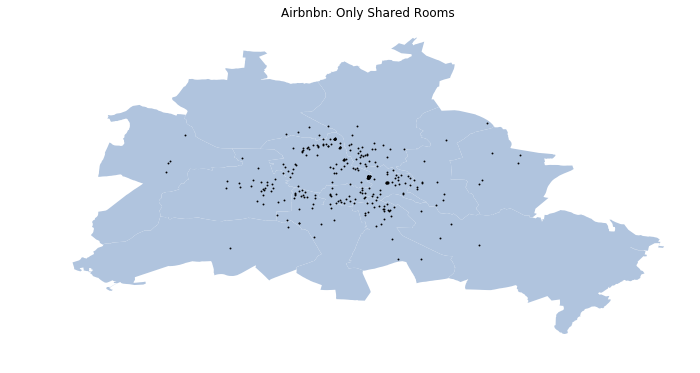

In [40]:
fig, ax = plt.subplots(figsize=(12, 6))

# first layer: plot the map of Berlin
berlin_districs.plot(ax=ax, color='lightsteelblue')
# second layer: plot the location of only shared rooms
ax.plot(shared_rooms.longitude, shared_rooms.latitude, 'o', markersize=0.9, color='black')

ax.set_title('Airbnbn: Only Shared Rooms')
ax.set_axis_off();

### Writing Geospatial Files

Geopandas can also write a GeoDataFrame to a file with the `to_file()` method. The first argument is the name of the resulting file or full path. In addition, you need to specify which file format you want to write the file in using the `driver` keyword:

```python 
# writing a Shapefile file
GeoDataFrame.to_file('mydata.shp', driver='ESRI Shapefile')

# writing a GeoJSON file
GeoDataFrame.to_file('mydata.geojson', driver='GeoJSON')

# writing a GeoPackage file
GeoDataFrame.to_file('mydata.gpkg', driver='GPKG')
```

***Wanna more?***

- Read the [GeoPandas Docs](http://geopandas.org/index.html)